# Projet linguistique

# **Les villes françaises ont-elles phonologiquement un vrai nom français ?**

**Auteur**: Yacine Touileb

**Date**: January 2025

## 1. Introduction

Pour ce projet, j'ai souhaité faire une analyse sur la langue française, mais avec une approche un peu particulière. En effet, lors des cours, nous nous sommes intéressés aux phonèmes, un aspect du cours que j'ai beaucoup apprécié. J'ai décidé de centrer mon analyse sur cet élément.

En français, on remarque que les phonèmes [a], [r], [l], [e] et [s] représentent à eux cinq 31,1 % de la fréquence dans la langue. J'ai donc voulu tester cette hypothèse et voir si, dans le lexique français, ces phonèmes en particulier sont plus présents que les autres.

Pour cela, j'ai choisi d'étudier phonologiquement le nom de toutes les villes de France. En effet, quoi de mieux pour étudier la France que d'examiner les noms donnés à son territoire ? Ainsi, cette analyse nous permettra de voir si les noms des villes françaises respectent cette répartition majoritaire ou non. Selon mon hypothèse, les villes françaises respectent cette répartition, et donc les phonèmes [a], [r], [l], [e] et [s] sont conséquemment représentés dans les noms des villes.

**Problématique** : Est ce que les noms de villes de France respectent la répartition phonologique majoriatire dans le français ?

**P1: Les villes de France respectent la répartition phonologique attendu.**

**P2: Plus la ville est grande plus il y'a de chance qu'elle respecte cette répartition.**

J'analyserai aussi la répartition des phonèmes en fonction de la population par ville pour voir si les villes les plus grandes (donc les plus peuplées) respectent davantage cette répartition, et si leurs noms sont phonologiquement plus "français" car elles sont les villes françaises les plus connues.
Et j'analyserai la répartition des phonèmes dans toutes les villes de France pour tester mon hypothèse de base.

Le code de toute cette analyse a été fourni par moi-même avec la réutilisation de bouts de code que j'ai utilisé dans des projets ultérieurs, mais aussi certain bout de code fourni par ChatGPT et d'autre que j'ai implémenté.

## 2. Importation des librairies

On importe toutes les librairies et ressources que l'on va utiliser dans notre analyse ici.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import spacy
from collections import Counter
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

## 3. Importation des données

On importe le dataset qui ici est un dataset que j'ai construit. Il a été récolté sur KAGGLE mais j'ai ensuite dû le nettoyé puis lui ajouté des valeurs qui lui manquait.

In [30]:
df = pd.read_csv("villes_cleaned.csv")
display(df)

,Unnamed: 0,Postal Code,x,y,iseecode,place,population,surface,altitude
0,0,64460,-0.178823,0.707010,64001,Aast,190,4.89,380.0
1,1,55130,-0.098100,0.787263,55001,Abainville,318,13.67,290.0
2,2,59265,-0.119887,0.820176,59001,Abancourt,433,5.69,50.0
3,3,60220,-0.137328,0.813363,60001,Abancourt,567,5.96,210.0
4,4,54610,-0.088690,0.792684,54001,Abaucourt,309,7.96,190.0
...,...,...,...,...,...,...,...,...,...
36546,36546,20272,-0.060698,0.674299,0,Zuani,51,5.16,680.0
36547,36547,62500,-0.130154,0.830862,62905,Zudausques,618,7.30,80.0
36548,36548,62370,-0.130764,0.832787,62906,Zutkerque,1713,16.50,25.0
36549,36549,59123,-0.125599,0.835700,59668,Zuydcoote,1578,2.54,2.0


## 4. Manipulation des données

Pour mon analyse, il faut que je regroupe les noms des différentes villes en des phonèmes. Mes camarades de classe m'ont conseillé http://www.lexique.org/?page_id=286 et c'est donc grâce à cette base de donnée Lexique que j'ai pu avoir les phonèmes pour mon analyse. Pour cela la fonction ici somme les occurences des différents phonèmes dans les noms des villes. En reprenant les TD et en codant les parties manquantes on obtiendra notre jeu de donnée avec les phonèmes qui correspondent aux villes.

In [ ]:
# On charge le modèle Spacy pour le français
nlp = spacy.load('fr_core_news_md') 

# On charge la base Lexique383 (La base de donnée donc)
lexique = pd.read_csv('Lexique383.tsv', sep='\t', encoding='utf-8')  

lexique_dict = dict(zip(lexique['ortho'], lexique['phon']))  # On un dictionnaire où chaque mot est mappé à ses phonèmes

# Voici la foncction qui analyse les noms des villes et compte les phonèmes
def compter_phonemes(texte):
    """
    Cette fonction prend un texte, le passe à Spacy pour l'analyser,
    puis compte les phonèmes de chaque mot à partir du lexique Lexique383.
    """
    doc = nlp(texte)  
    phoneme_counter = Counter()  
    
    
    for token in doc:
        mot = token.text.lower()  
        phonemes = lexique_dict.get(mot)  
        if phonemes:
            
            for phoneme in phonemes:
                phoneme_counter[phoneme] += 1  
    
    return phoneme_counter  


df['phoneme_counts'] = df['place'].apply(lambda x: compter_phonemes(x))  # On applique la fonction à chaque nom de ville dans la colonne 'place'

# Avec ce bout de code on créer des colonnes uniques
phoneme_columns = set(phoneme for counts in df['phoneme_counts'] for phoneme in counts.keys())  
for phoneme in phoneme_columns:
    # Puis on ajoute à la colonne le phonème à chaque fois qu'il apparait
    df[phoneme] = df['phoneme_counts'].apply(lambda x: x.get(phoneme, 0))  

# On supprime cette colonne à la fin du comptage
df.drop(columns=['phoneme_counts'], inplace=True)  
df.to_csv('villes_avec_phonemes.csv', index=False, encoding='utf-8')  # Sauvegarde des données modifiées dans un nouveau fichier CSV

display(df)  



## 5. Représentation des données

### a) Représentation des données monovariées

On vient maintenant représenter graphiquement tous les phonèmes que l'on a compté grâce à la fonction précèdente, et on les représente en fonctions de leurs occurences dans le nom des villes françaises.

C:\Users\Yacine\AppData\Local\Temp\ipykernel_9932\1351941819.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


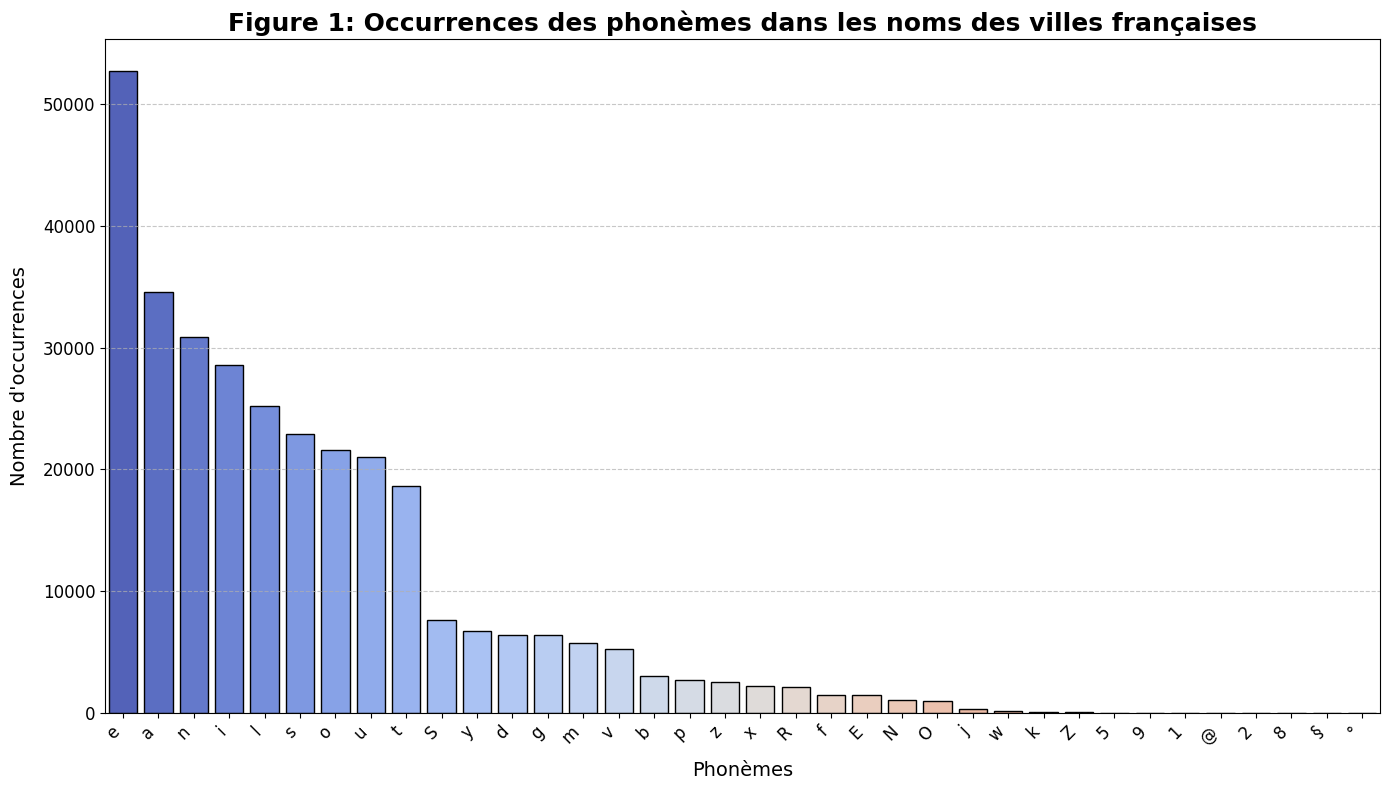

In [22]:
# Liste de toutes les colonnes de phonèmes, on les listes toutes
phoneme_columns = ['v', '@', 'f', '1', 'o', 'y', '°', 'N', 'l', 'S', 'E', 'Z', 'x',
                   'b', 's', 'u', 'g', 'i', 'O', '9', 'p', 'z', 'e', '5', 't', 'a', 
                   'n', 'w', 'm', '2', '8', 'k', 'j', '§', 'R', 'd']

# Fonction pour compter les phonèmes 
def compter_phonemes(texte):
    phoneme_counter = Counter()
    for phoneme in texte:
        phoneme_counter[phoneme] += 1
    return phoneme_counter
df['phoneme_counts'] = df['place'].apply(lambda x: compter_phonemes(x))


# On trie les colonnes
for phoneme in phoneme_columns:
    df[phoneme] = df['phoneme_counts'].apply(lambda x: x.get(phoneme, 0))

# On somme les phonèmes similaires pour ne faire qu'une seule colonne par phonème
phoneme_counts = df[phoneme_columns].sum().reset_index()
phoneme_counts.columns = ['Phonème', 'Occurrences']

# On trie les colonnes
phoneme_counts = phoneme_counts.sort_values(by='Occurrences', ascending=False)

# On représente graphiquement nos données avec ici un barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=phoneme_counts,
    x='Phonème',
    y='Occurrences',
    palette=sns.color_palette("coolwarm", len(phoneme_counts)),
    edgecolor="black"  
)

# Pour une meilleur lisibilité et harmonie visuel, on créer des figures en panel, en les numérotant et en créant une harmonie de couleur.
plt.title('Figure 1: Occurrences des phonèmes dans les noms des villes françaises', fontsize=18, fontweight='bold')
plt.xlabel('Phonèmes', fontsize=14, labelpad=10)
plt.ylabel('Nombre d\'occurrences', fontsize=14, labelpad=10)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



On remarque que nos prédictions pour le moment ne sont pas erronés avec les phonèmes [a], [r], [l], [e] et [s] qui se retrovent presque tous dans les phonèmes les plus présent. On remarque aussi que les voyelles phonèmes dominent sur les autres. (d'après la figure 1.a)

### b) Représentation des données bivariées

On vient faire 2 représentations graphique pour les données qui nous intéressent.

C:\Users\Yacine\AppData\Local\Temp\ipykernel_9932\53991547.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


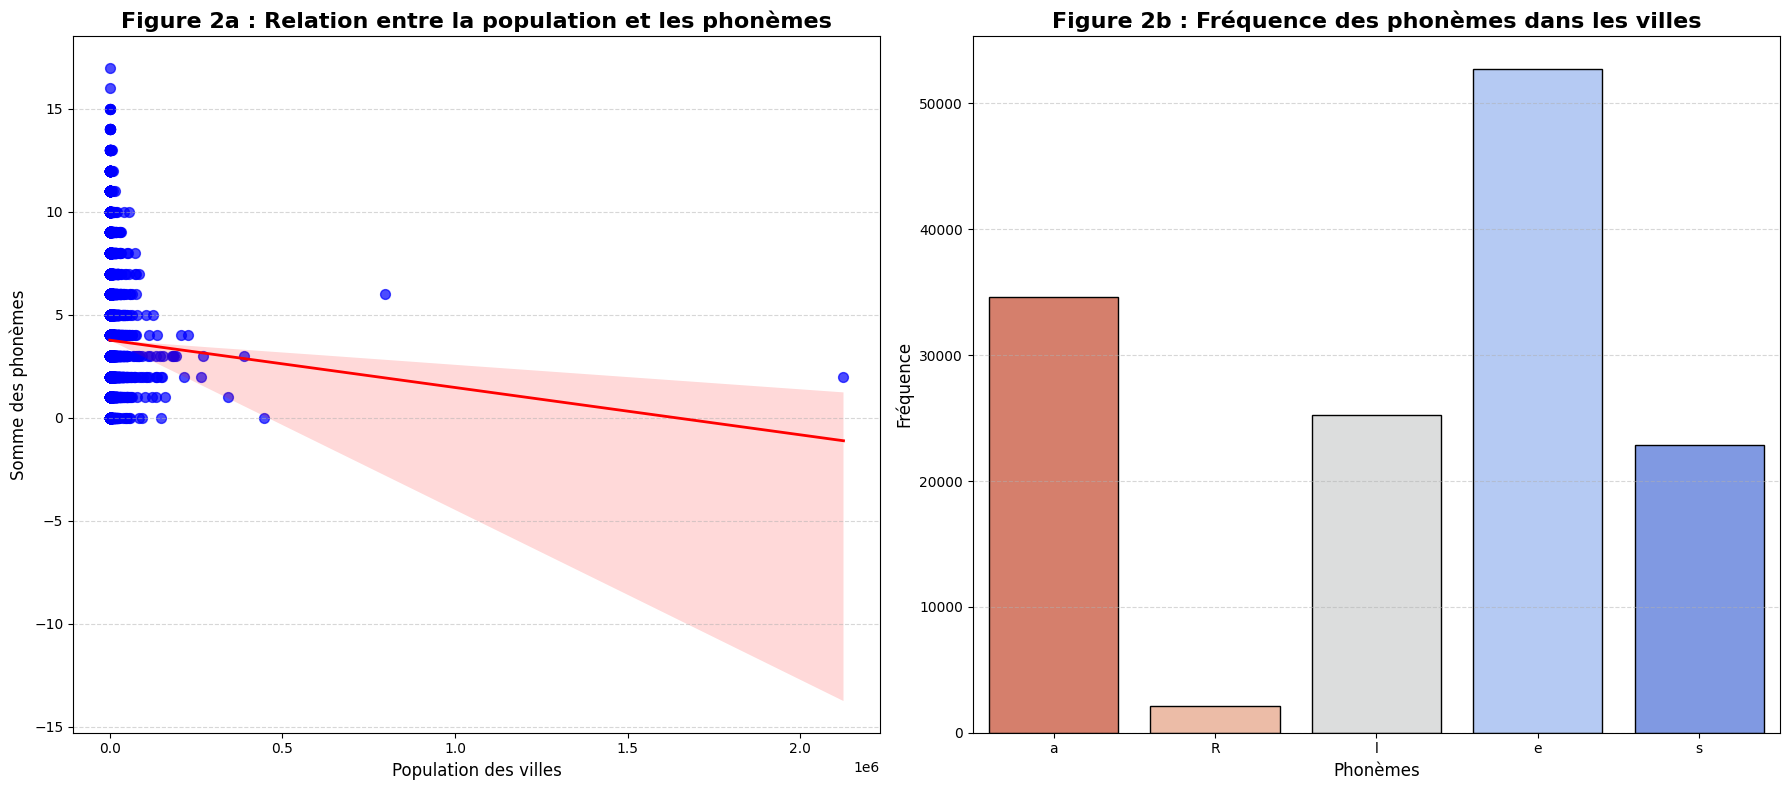

In [ ]:

# Liste des phonèmes à tester on prend que ceux qui nous interessent pour ne pas avoir un surplus de données.
phonemes_to_test = ['a', 'R', 'l', 'e', 's']

# Ce code nous permet de gérer les valeurs manquantes
for phoneme in phonemes_to_test:
    if phoneme not in df.columns:
        df[phoneme] = 0  

# On calcule la somme des phonèmes pour chaque ville
df['phoneme_sum'] = df[phonemes_to_test].sum(axis=1)

# Maintenant de toutes les villes
phoneme_totals = df[phonemes_to_test].sum()

# Pour plus de lisibilité on créer un panel pour les figures 2
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Figure 2a : Scatterplot 
sns.regplot(
    x='population',
    y='phoneme_sum',
    data=df,
    scatter_kws={'color': 'blue', 's': 50, 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2},
    ax=axes[0]
)
axes[0].set_title('Figure 2a : Relation entre la population et les phonèmes', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Population des villes', fontsize=12)
axes[0].set_ylabel('Somme des phonèmes', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Figure 2b : Barplot des fréquences des phonèmes
sns.barplot(
    x=phoneme_totals.index,
    y=phoneme_totals.values,
    palette='coolwarm_r',
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_title('Figure 2b : Fréquence des phonèmes dans les villes', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Phonèmes', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()



Voici notre figure 2 qui vient pour la 2.a représenter le scatterplot avec une droite de régression des phonèmes qui nous intéressent en fonction de la population de la ville et pour la 2.b les phonèmes qui nous intéressent en fonction de leurs fréquences dans le noms de toutes les villes.

## 6. Tests statistiques

Maintenant on va faire les tests statistiques nécessaires pour tester mes hypothèses.

Pour l'hypothèse 1 on a 2 valeurs catégorielles donc on fera un test du Chi-2.

Pour l'hypothèse 2 il était plus compliqué de savoir quel test faire, mais après plusieurs recherche sur internet et dans mon cours de maths, j'ai trouvé que c'est le Test de Neymann-Pearson qui était le plus adapté.

On commence donc par tester l'hypothèse 2.

### a) Test de Neymann-Pearson

In [24]:
df['phoneme_sum'] = df[phonemes_to_test].sum(axis=1)

# On fait le test
corr, p_value = pearsonr(df['population'], df['phoneme_sum'])
print(f"Corrélation entre la population et la fréquence des phonèmes: {corr:.4f}")
print(f"p-value du test de Pearson: {p_value:.4f}")


Corrélation entre la population et la fréquence des phonèmes: -0.0138
p-value du test de Pearson: 0.0081


### b) Test du Chi-2

In [25]:
# Pour avoir un test du Chi-2 plus propre et lisible on reprend un code que j'ai utilisé ultérieurement pour que l'on est un tableau en sortie.

# On créer une liste vide pour stocker nos éléments
results = []

# On redonne la liste à tester
phonemes_to_test = ['a', 'R', 'l', 'e', 's']

# On crée une table de contingence pour les phonèmes en fonction de la population 
for phoneme in phonemes_to_test:
    try:
        
        # Pour cela, on va créer une colonne binaire : 1 si le phonème est présent, sinon 0
        df['phoneme_present'] = df[phoneme].apply(lambda x: 1 if x > 0 else 0)
        
        # On recrée une table de contingence
        contingency_table = pd.crosstab(df['phoneme_present'], df['population'])
        
        # On fait le test du Chi-deux
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # On remplit la liste
        results.append({
            'Phonème': phoneme,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Significatif': 'Oui' if p < 0.05 else 'Non'
        })
    except KeyError as e:
        print(f"Erreur avec la colonne : {phoneme}. Détail : {e}")


results_df = pd.DataFrame(results)

# On a enfin notre tableau
display(results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]))


,Phonème,Chi2,p-value,Degrees of Freedom,Significatif
0,a,5463.731149,0.085624,5322,Non
1,R,5582.319492,0.006394,5322,Oui
2,l,5380.582139,0.283590,5322,Non
3,e,5231.862891,0.808447,5322,Non
4,s,5380.348466,0.284352,5322,Non


# 7. Résultats

Pour notre hypothèse 2, le test de Neymann-Pearson renvoie une corrélation proche de 0 (coef=-0.0138), donc il n'y a pas de relation linéaire entre la population des villes et la fréquence de nos phonèmes. Cependant notre test est significatif (p-valeur=0.0081).

Pour notre hypothèse 1, on remarque que pour les phonèmes 'a', 'l', 'e', 's' ne sont pas significatif, leur p-valeurs est plus petite que 0.05 donc la distribution des phonèmes est bien celle attendu, mais pour le phonème 'R' le test est significatif (p=0.006394), la distribution n'est pas celle attendu.

# 8. Conclusion

En conclusion, on remarque que notre hypothèse 1 est partiellement verifié, les phonèmes 'a', 'l', 'e', 's' sont bien majoritairement représenté avec leur p-valeur non significatif, l'écart attendu est l'écart trouvé. Cependant pour le phonème 'R' la p-valeur étant significative, la répartition n'est pas celle attendu, on peux le remarquer nottamment avec la figure 1, ou la distribution du 'R' est plus basse que celle des autres.

Ainsi il n'y que le phonème 'R' qui ne suit pas la distribution classique majoritaire admises en français, on peut donc conclure que les noms des villes françaises sonnent bien phonologiquement français.

Pour notre hypothèse 2 on voit que notre test est significatif donc on a bien une relation entre les phonèmes 'a', 'l', 'e', 's','R' qui nous intéressent et leur fréquence dans dans les noms des villes les plus peuplés en France. Donc les grandes villes française ont bien un nom qui sonne phonologiquement français.

Cependant il y'a des limites à notre analyse la première étant que beaucoup de nom de ville française sont emprunté au pays frontaliers, les villes en frontière de l'Allemagne auront un nom plus germanique par exemple.

Il serait alors intéressant de scrapper l'étymologie des noms pour en avoir l'origine, or je n'ai pas les outils nécessaires (après 2h de scrapping mon PC a planté il ne supporte pas ce code).

# ANALYSE BONUS

Comme scrapper les étymologies des noms se retrouve être impossible, j'ai décidé de fournir une analyse bonus sur les types de phonèmes dans le nom des villes et mon hypothèse cette fois c'est qu'il y'ai plus de voyelle car en français phonologiquement ce sont les voyelles qui domine. Et comme notre analyse précédente a montré que les villes de France ont phonogiquement un nom français on peut émettre cette hypothèse.

**P3: Les villes de France possèsent phonoloqiquement plus de voyelle .**



# 9. Manipulation des données

Pour avoir le type des phonèmes on réutilise le jeu de donnée Lexique et après plusieurs échecs, une camarade m'a conseillé d'ajouter à mon dataset une colonne pour le type des phonèmes puis on l'analyse.

In [ ]:

# On associce chaque phonème à son type
PHONEMES_CATEGORIES = {
    'e': 'voyelle fermée', 'k': 'occlusive', 'm': 'nasale', 'w': 'semi-voyelle', 'y': 'voyelle', 'v': 'fricative',
    '§': 'voyelle', 'O': 'voyelle ouverte', 'l': 'liquide', 'z': 'sifflante', '°': 'voyelle', 'N': 'nasale',
    '1': 'voyelle nasale', 'u': 'voyelle', 'p': 'occlusive', 'Z': 'fricative', '@': 'voyelle nasale', 's': 'sifflante',
    'f': 'fricative', 'g': 'occlusive', 'd': 'occlusive', 'i': 'voyelle', '5': 'voyelle nasale', 'S': 'sifflante',
    'j': 'semi-voyelle', '2': 'voyelle fermée', '9': 'voyelle ouverte', 'n': 'nasale', 'o': 'voyelle fermée',
    '8': 'semi-voyelle', 'E': 'voyelle ouverte', 'a': 'voyelle', 'x': 'fricative', 'b': 'occlusive', 'R': 'liquide', 't': 'occlusive'
}

# On ajoute les colonnes
def regrouper_par_type(df):
    
    phoneme_type_columns = ['voyelle', 'voyelle fermée', 'voyelle ouverte', 'voyelle nasale', 'semi-voyelle',
                            'fricative', 'liquide', 'sifflante', 'occlusive', 'nasale']
    
    
    for col in phoneme_type_columns:
        df[col] = 0
    
    # On additionne chaque phonème 
    def additionner_phonemes(row):
        
        type_counts = {key: 0 for key in phoneme_type_columns}
        
        # On calcule les fréquences en retirant les valeurs manquantes
        for phoneme, count in row.items():
            if phoneme in PHONEMES_CATEGORIES and isinstance(count, int):  
                phoneme_type = PHONEMES_CATEGORIES[phoneme]
                type_counts[phoneme_type] += count
        
        return pd.Series(type_counts)  

    # On rajoute la colonne à mon Dataframe
    df[phoneme_type_columns] = df.apply(additionner_phonemes, axis=1)
    
    return df

# On regroupe les phonèmes
df = regrouper_par_type(df)



# 10. Représentation des données

On représente graphiquement les types de phonèmes en fonction de leurs occurences. On utilise quasiment le même code que pour notre cas précédent.

C:\Users\Yacine\AppData\Local\Temp\ipykernel_9932\278388874.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_phoneme_counts, x='Type de phonème', y='Occurrences', palette=['blue', 'red'])
C:\Users\Yacine\AppData\Local\Temp\ipykernel_9932\278388874.py:12: UserWarning: 
The palette list has fewer values (2) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=type_phoneme_counts, x='Type de phonème', y='Occurrences', palette=['blue', 'red'])


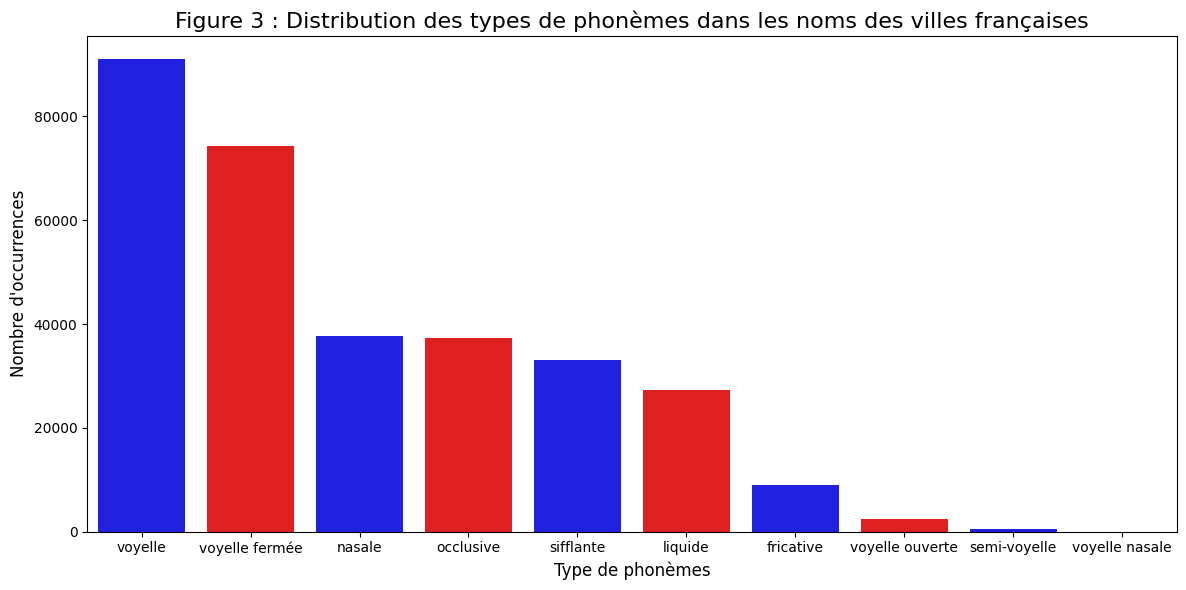

In [ ]:
# Voici la liste des types de phonèmes
type_phoneme_columns = ['voyelle', 'voyelle fermée', 'voyelle ouverte', 'voyelle nasale', 'semi-voyelle',
                        'fricative', 'liquide', 'sifflante', 'occlusive', 'nasale']

# On calcule la somme pour chaque type de phonème dans le DataFrame
type_phoneme_counts = df[type_phoneme_columns].sum().reset_index()
type_phoneme_counts.columns = ['Type de phonème', 'Occurrences']
type_phoneme_counts = type_phoneme_counts.sort_values(by='Occurrences', ascending=False)

# On créé un barplot 
plt.figure(figsize=(12, 6))  
sns.barplot(data=type_phoneme_counts, x='Type de phonème', y='Occurrences', palette=['blue', 'red']) 

# On nomme la figure
plt.title('Figure 3 : Distribution des types de phonèmes dans les noms des villes françaises', fontsize=16)
plt.xlabel('Type de phonèmes', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)


plt.tight_layout()  
plt.show()  




On remarque que selon notre figure 3 c'est bien les voyelles qui sont les plus présentes dans le nom des villes françaises.

# 11. Tests statistiques

Maintenant on va faire les tests statistiques nécessaires pour tester mon hypothèse.

Pour l'hypothèse 3 on a 2 valeurs catégorielles donc on fera un test du Chi-2. On reprend le même code que pour le test d'au-dessus.

In [ ]:
# On ajoute liste pour stocker nos résultats
results = []

# La liste que l'on va utilisé
phoneme_types = ['voyelle', 'voyelle fermée', 'voyelle ouverte', 'voyelle nasale', 'semi-voyelle',
                 'fricative', 'liquide', 'sifflante', 'occlusive', 'nasale']

# COn créer une table de contingence
for phoneme_type in phoneme_types:
    try:
        # Créer une colonne binaire : 1 si le phonème de ce type est présent, sinon 0
        df['phoneme_type_present'] = df[phoneme_type].apply(lambda x: 1 if x > 0 else 0)
        
        # On crée une table de contingence
        contingency_table = pd.crosstab(df['phoneme_type_present'], df['population'])
        
        # On fait le test du Chi-2
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # On remplit le tableau
        results.append({
            'Type de phonème': phoneme_type,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Significatif': 'Oui' if p < 0.05 else 'Non'
        })
    except KeyError as e:
        print(f"Erreur avec la colonne : {phoneme_type}. Détail : {e}")


results_df = pd.DataFrame(results)

# On a finalement notre tableau
import pandas as pd
display(results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]))



,Type de phonème,Chi2,p-value,Degrees of Freedom,Significatif
0,voyelle,5955.017929,0.000000,5322,Oui
1,voyelle fermée,5181.148806,0.914812,5322,Non
2,voyelle ouverte,5535.017019,0.020465,5322,Oui
3,voyelle nasale,0.000000,1.000000,0,Non
4,semi-voyelle,5457.273922,0.095661,5322,Non
5,fricative,5174.030339,0.925246,5322,Non
6,liquide,5401.897426,0.218568,5322,Non
7,sifflante,5270.733753,0.688658,5322,Non
8,occlusive,5406.604465,0.205482,5322,Non
9,nasale,5350.814918,0.387725,5322,Non


# 12. Résultats

Pour notre hypothèse 3 le test n'est significatif que pour 2 types de phonèmes les 'voyelle' avec une p-valeur de 0.000000 et les 'voyelle ouverte' avec une p-valeur de 0.020465.
On remarque pour les 'voyelle nasale' test n'a pas été effectué, on un degrès de liberté de 0 car aucune valeur n'a été trouvé.

# 13. Conclusion

En conclusion, comme émit dans l'hypothèse 3 et dans la figure 3, le test statistiques a montré que les voyelles (les voyelles ouvertes aussi) sont bien majoritaires dans les noms des villes françaises.

Ceci est en accord avec les résultats de notre analyse précédente car les voyelles sont composé majoritairement des phonèmes les plus présents dans le nom des villes.

Ceci renforce les résultats de notre première analyse et on rencontre toujours la même limite, celle de l'étymologie.
Dans une autre analyse complétant celle-ci il serait intéressant d'analyser l'étymologie pour avoir un ensemble complet sur les noms des villes françaises, apportant de meilleurs conclusions et un dataset complet.
